# Assignment-3

## - Import Libraries

Import necessary libraries used in these assignment.

In [1]:
import numpy as np
import pandas as pd
import math
import operator
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def splitTrainTest(data,percent):
    total=len(data)
    trainTotal=int(total*percent*0.01)
    testTotal=total-trainTotal
    return (data[0:trainTotal],data[trainTotal:total])

In [201]:
def traintestXY(train,test,independentVariable,targetIndex):
    trainX=train[:,independentVariable]
    trainX=((trainX-trainX.mean(axis=0))/trainX.std(axis=0))    
    testX=test[:,independentVariable]
    testX=((testX-testX.mean(axis=0))/testX.std(axis=0))    
    trainY=train[:,targetIndex]
    trainY=trainY.reshape(-1,1)
    testY=test[:,targetIndex]
    return (trainX,trainY,testX,testY)

## Question-2

### Part-1 Logistic Regression 

In [3]:
def sigmoid(x):
    return 1/(1+np.e**(-x))

In [4]:
def logisticLoss(yactual,hx):
    return -np.mean(yactual*np.log(hx)+(1-yactual)*np.log(1-hx))

In [202]:
def logistic(data,percent=80,thresold=0.5,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,learningRate=0.01):
    data[:,targetIndex]=[1 if x>=thresold else 0 for x in data[:,targetIndex]]
    
    train,test=splitTrainTest(data,percent)
    trainX=train[:,independentVariable]
    trainX=((trainX-trainX.mean(axis=0))/trainX.std(axis=0))    
    testX=test[:,independentVariable]
    testX=((testX-testX.mean(axis=0))/testX.std(axis=0))    
    trainY=train[:,targetIndex]
    testY=test[:,targetIndex]
    m=len(trainX)
    trainY=trainY.reshape(-1,1)
    
    theta=np.zeros((7,1))
    intercept=np.zeros((1,1))
    
    for epoch in range(50000):
        #######
        ypred=np.matmul(trainX,theta)+intercept
        hx=sigmoid(ypred)
        dz=hx-trainY
#         loss=logisticLoss(trainY,hx)
        dTheta=np.matmul(trainX.T,dz)/m
        dintercept=np.sum(dz)

        theta=theta-learningRate*dTheta
        intercept=intercept-learningRate*dintercept
#         if epoch%100==0:
#             print(loss)
#     print("=========================================")
#     print("Intercept: ")
#     print(intercept)
#     print("Coefficents: ")
#     print(theta)
#     print("=========================================")
    testPred=np.matmul(testX,theta)+intercept
    
    hxTest=sigmoid(testPred)

    accuracyList=[]
    precisionList=[]
    recallList=[]
    f1ScoreList=[]
    count=0
    TP=0
    TN=0
    FP=0
    FN=0
    precision=0
    recall=0
    for a,b in zip(testY,hxTest):
        orig=a
#         if a>=thresold:
#             orig=1
#         else:
#             orig=0
        if b>=thresold:
            pred=1
        else:
            pred=0
        if orig==pred:
            count+=1
            if pred==1:
                TP+=1
            else:
                TN+=1
        else:
            if pred==1:
                FP+=1
            else:
                FN+=1
#         print("%10s | %10s"%(a,b))
    accuracy=count/len(testY)
    recall=TP/(TP+FN)
    precision=TP/(TP+FP)
    f1score=(2*recall*precision)/(recall+precision)
#         accuracyList.append(accuracy)
#         precisionList.append(precision)
#         recallList.append(recall)
#         f1ScoreList.append(f1score)

    return (accuracy,precision,recall,f1score)
#     return (accuracyList,precisionList,recallList,f1ScoreList)

In [203]:
data=pd.read_csv("AdmissionDataset/data.csv").values
# data=data.sample(frac=1).values
accuracy,precision,recall,f1score=logistic(data,80,0.5)
print("=================================")
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("f1-score: ",f1score)
print("=================================")

Accuracy:  0.9444444444444444
Precision:  0.9523809523809523
Recall:  0.9876543209876543
f1-score:  0.9696969696969696


### Part-2 Comparision of logistic regression and KNN model

In [81]:
def distMeasure(dataset,testdataset,targetIndex,p):
    n=len(testdataset)
    dist=0
    for i in range(n):
        if i==targetIndex:continue
        dist+=math.pow(abs(dataset[i]-testdataset[i]),p);
    return math.pow(dist,1/p)

In [82]:
def KNNAlgo(train,testRecord,k,targetIndex,p):
    dists={}
    count=0
    if p==3:
        funct=chebyshev
    else:
        funct=distMeasure
    for trainRecord in train:
        dist=funct(trainRecord,testRecord,targetIndex,p)
        dists[(str(trainRecord),trainRecord[targetIndex],count)]=dist
        count+=1
    sortedDict= sorted(dists.items(), key=operator.itemgetter(1))
    labelDict={}
    for i in range(k):
        if sortedDict[i][0][1] in labelDict.keys():
            labelDict[sortedDict[i][0][1]]+=1
        else:
            labelDict[sortedDict[i][0][1]]=1
    return max(labelDict.items(),key=operator.itemgetter(1))[0]

In [83]:
def predict(train,test,k,targetIndex,p):
    count=0
    TP=0
    TN=0
    FP=0
    FN=0
    precision=0
    recall=0
    for testRecord in test:
        predicted=KNNAlgo(train,testRecord,k,targetIndex,p)
        actual=testRecord[targetIndex]
        if actual==predicted:
            count+=1
            if predicted==1:
                TP+=1
            else:
                TN+=1
        else:
            if predicted==1:
                FP+=1
            else:
                FN+=1
    accuracy=count/len(test)
    recall=TP/(TP+FN)
    precision=TP/(TP+FP)
    f1score=(2*recall*precision)/(recall+precision)
    return (accuracy,precision,recall,f1score)

In [84]:
data=pd.read_csv("AdmissionDataset/data.csv")
data=data.sample(frac=1).values
print("====================================")
print("Performance of Logistic Regression")
accuracy,precision,recall,f1score=logistic(data,80)
print("=================================")
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("f1-score: ",f1score)
print("=================================")

data=data[:,1:]
data[:,7]=[1 if x>0.5 else 0 for x in data[:,7]]
train,validate=splitTrainTest(data,80)
accuracy,precision,recall,f1score=predict(train,validate,7,7,2)
print("Performance of KNN model")
print("====================================")
print("Accuracy: %f"%(accuracy))
print("Precision: %f"%(precision))
print("Recall: %f"%(recall))
print("f1-score: %f"%(f1score))
print("====================================")

Performance of Logistic Regression
Accuracy:  [0.9555555555555556]
Precision:  [0.9518072289156626]
Recall:  [1.0]
f1-score:  [0.9753086419753086]
Performance of KNN model
Accuracy: 0.922222
Precision: 0.918605
Recall: 1.000000
f1-score: 0.957576


### Part 3

In [178]:
mpl.rcParams.update(mpl.rcParamsDefault)
def drawGraph(trainFile,percent):
    accuracyList=[]
    precisionList=[]
    recallList=[]
    f1ScoreList=[]
    for i in [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]:
        print(i)
        accuracy,precision,recall,f1score=logistic(data,percent,i)
        accuracyList.append(accuracy)
        precisionList.append(precision)
        recallList.append(recall)
        f1ScoreList.append(f1score)
        
    plt.title("Correlation between thresold value and performance measures")
    plt.xlabel("Thresold value")
    plt.ylabel("Performance Measures")
    plt.grid(True)
    print(precisionList)
    print(recallList)
#     plt.plot([ i*0.1 for i in range(0,10)],accuracyList ,color="green", linewidth=2.5,label="Accuracy")
    plt.plot([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0], precisionList,color="orange", linewidth=2.5,label="Precision")
#     plt.plot([ i*0.1 for i in range(0,10)], f1ScoreList,color="b", linewidth=2.5,label="F1-Score")
    plt.plot([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0], recallList,color="m", linewidth=2.5,label="Recall")
    
    plt.legend(loc=3)
    plt.show()
    

0.9
       0.0 | [6.85886111e-11]
       0.0 | [1.20258236e-14]
       0.0 | [4.57320896e-10]
       0.0 | [3.24050149e-11]
       0.0 | [0.0002158]
       0.0 | [4.23736032e-07]
       0.0 | [7.52560355e-06]
       0.0 | [2.13688262e-05]
       1.0 | [0.91250551]
       0.0 | [9.86923492e-12]
       0.0 | [4.16463927e-06]
       0.0 | [3.3521693e-06]
       0.0 | [0.00045033]
       1.0 | [0.95707236]
       1.0 | [0.99252589]
       0.0 | [1.29829129e-05]
       1.0 | [0.96214181]
       0.0 | [0.00114445]
       0.0 | [0.00437604]
       0.0 | [3.45820283e-15]
       1.0 | [0.86902885]
       0.0 | [1.09497717e-05]
       0.0 | [0.00045419]
       0.0 | [7.62670222e-10]
       0.0 | [0.00074946]
       1.0 | [0.54759476]
       0.0 | [0.07602276]
       0.0 | [1.50970265e-09]
       0.0 | [0.00312451]
       0.0 | [0.00014746]
       0.0 | [2.83082904e-09]
       0.0 | [1.26704292e-09]
       0.0 | [0.01444841]
       0.0 | [3.28768414e-05]
       0.0 | [0.20706308]
       0.0 | [0.

       0.0 | [6.85886111e-11]
       0.0 | [1.20258236e-14]
       0.0 | [4.57320896e-10]
       0.0 | [3.24050149e-11]
       0.0 | [0.0002158]
       0.0 | [4.23736032e-07]
       0.0 | [7.52560355e-06]
       0.0 | [2.13688262e-05]
       1.0 | [0.91250551]
       0.0 | [9.86923492e-12]
       0.0 | [4.16463927e-06]
       0.0 | [3.3521693e-06]
       0.0 | [0.00045033]
       1.0 | [0.95707236]
       1.0 | [0.99252589]
       0.0 | [1.29829129e-05]
       1.0 | [0.96214181]
       0.0 | [0.00114445]
       0.0 | [0.00437604]
       0.0 | [3.45820283e-15]
       1.0 | [0.86902885]
       0.0 | [1.09497717e-05]
       0.0 | [0.00045419]
       0.0 | [7.62670222e-10]
       0.0 | [0.00074946]
       1.0 | [0.54759476]
       0.0 | [0.07602276]
       0.0 | [1.50970265e-09]
       0.0 | [0.00312451]
       0.0 | [0.00014746]
       0.0 | [2.83082904e-09]
       0.0 | [1.26704292e-09]
       0.0 | [0.01444841]
       0.0 | [3.28768414e-05]
       0.0 | [0.20706308]
       0.0 | [0.1749

       0.0 | [6.85886111e-11]
       0.0 | [1.20258236e-14]
       0.0 | [4.57320896e-10]
       0.0 | [3.24050149e-11]
       0.0 | [0.0002158]
       0.0 | [4.23736032e-07]
       0.0 | [7.52560355e-06]
       0.0 | [2.13688262e-05]
       1.0 | [0.91250551]
       0.0 | [9.86923492e-12]
       0.0 | [4.16463927e-06]
       0.0 | [3.3521693e-06]
       0.0 | [0.00045033]
       1.0 | [0.95707236]
       1.0 | [0.99252589]
       0.0 | [1.29829129e-05]
       1.0 | [0.96214181]
       0.0 | [0.00114445]
       0.0 | [0.00437604]
       0.0 | [3.45820283e-15]
       1.0 | [0.86902885]
       0.0 | [1.09497717e-05]
       0.0 | [0.00045419]
       0.0 | [7.62670222e-10]
       0.0 | [0.00074946]
       1.0 | [0.54759476]
       0.0 | [0.07602276]
       0.0 | [1.50970265e-09]
       0.0 | [0.00312451]
       0.0 | [0.00014746]
       0.0 | [2.83082904e-09]
       0.0 | [1.26704292e-09]
       0.0 | [0.01444841]
       0.0 | [3.28768414e-05]
       0.0 | [0.20706308]
       0.0 | [0.1749

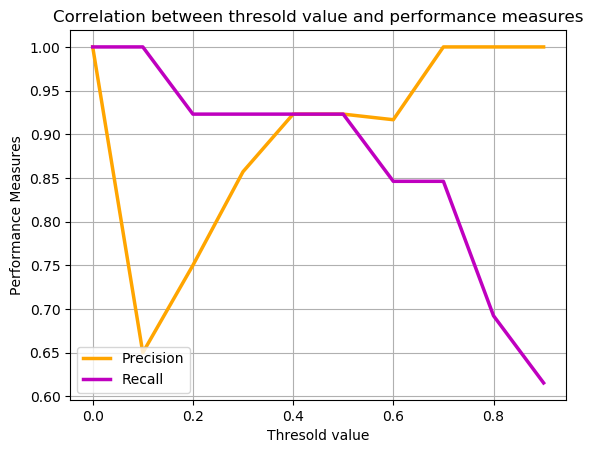

In [198]:
data=pd.read_csv("AdmissionDataset/data.csv").values
# data=data.sample(frac=1).values
drawGraph(data,80)

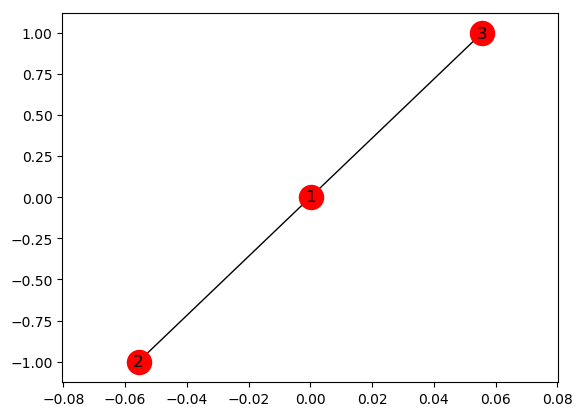